## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#Reading from the dataset
df=pd.read_csv("ab_data.csv")

b. Use the below cell to find the number of rows in the dataset.

In [3]:
#Calculating total number of rows
no_rows = df.shape[0]
print("Number of rows :",no_rows)

Number of rows : 294478


c. The number of unique users in the dataset.

In [4]:
# Calculating number of unique users
unique_users= df['user_id'].nunique()
print("Number of unique users :",unique_users)

Number of unique users : 290584


d. The proportion of users converted.

In [5]:
# Calculating number of users that were converted on an average
total_conv=df['converted'].mean()
print("Proportion of users converted :",total_conv)

Proportion of users converted : 0.11965919355605512


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# Calculating number of instances when group 'treatment' and landing page 'new_page' dont match 
no_instances= df[((df['group']=='treatment') == (df['landing_page']=='new_page'))==False].shape[0]
print("Total number of instances when new_page and treatment don't line up :",no_instances)

Total number of instances when new_page and treatment don't line up : 3893


f. Do any of the rows have missing values?

In [7]:
#Calculating if any rows have missing values
null_rows=df.isnull().any()
print("Number of rows with missing values :","\n",null_rows)

Number of rows with missing values : 
 user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# Creating a new dataset from previous dataset
df2=df[((df['group']=='treatment') & (df['landing_page']=='new_page')) | ((df['group']=='control') & (df['landing_page']=='old_page'))]
print("The new dataset is as follows:")
df2.head()

The new dataset is as follows:


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
# Calculating number of unique users in new dataset
unique_users2 = df2['user_id'].nunique()
print("Number of unique users :",unique_users2)

Number of unique users : 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
# Printing the one user_id which is duplicated
print(df2[df2.duplicated('user_id')])

      user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


c. What is the row information for the repeat **user_id**? 

In [13]:
# Printing the row of duplicate user_id
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
# Removing one row of the duplicate user_id
df2.drop(labels=1899, axis=0, inplace=True)
# Checking if the row is removed
df2[df2['user_id'] == 773192]

C:\Users\deo_joshi\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
# Calculating probability of individuals converting
print("Probability of an individual converting :",df2['converted'].mean())

Probability of an individual converting : 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
# Calculating probability of individuals converting from the control group
control_conv = df2.query('group=="control"')['converted'].mean()
print("Probability of an individual converting from control group:",control_conv)

Probability of an individual converting from control group: 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
# Calculating probability of individuals converting from the treatment group
treat_conv=df2.query('group=="treatment"')['converted'].mean()
print("Probability of an individual converting from treatment group:",treat_conv)

Probability of an individual converting from treatment group: 0.11880806551510564


d. What is the probability that an individual received the new page?

In [17]:
#Calculating the Probability of an individual receiving the new_page
prob_new_page= df2['landing_page'].value_counts()[0]/df2.shape[0]
print("Probability that an individual received the new page :",prob_new_page)

Probability that an individual received the new page : 0.500061944223


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

After doing calculations on the new data set, we have calculated the overall probability of an individual converting is 0.11959708724499628.
Now, the probability of an individual converting from control group is found to be 0.1203863045004612 which is only marginally greater than the probability of an individual converting from treatment group i.e. 0.11880806551510564. 

Also, the probability that an individual received the new page is 0.5. This means, there are 50 % chances of an individual receiving the new page. This proves that we cannot say that the difference in conversion rate of control and treatment group is due to an individual receiving more new pages. 

Given the scenario, it cannot be concluded that one page leads to more conversions.
Thus, there is no sufficient evidence to say that the new treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Null hypothesis, H0 : pold>=pnew or pnew - pold <=0

Null hyphothesis is that the old page has a higher conversion rate.

Alternative hypothesis, H1 : pold< pnew or pnew-pold>0

Alternative hypothesis is that the new page has a higher conversion rate.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [37]:
# Conversion rate of new_page under null hypothesis
p_new=df2.query('landing_page=="new_page"').converted.mean()
p_old=df2.query('landing_page=="old_page"').converted.mean()

# Mean conversion rate
p_avg = (p_new+p_old)/2

print("Conversion rate of new_page under null hypothesis :",p_avg)

Conversion rate of new_page under null hypothesis : 0.11959718500778342


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [39]:
# Conversion rate of old_page under null hypothesis

print("Conversion rate of old_page under null hypothesis :",p_avg)

Conversion rate of old_page under null hypothesis : 0.11959718500778342


c. What is $n_{new}$?

In [40]:
# Number of users that land on new_page
n_new=df2.query('landing_page == "new_page"').user_id.count()
print("Number of users that land on new_page : ",n_new)

Number of users that land on new_page :  145310


d. What is $n_{old}$?

In [41]:
# Number of users that land on old_page
n_old=df2.query('landing_page == "old_page"').user_id.count()
print("Number of users that land on new_page : ",n_old)

Number of users that land on new_page :  145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [42]:
#Simulating the stastic of new page conversions
new_page_converted = np.random.choice([1,0],size=n_new,p=[p_avg,(1-p_avg)]).mean()

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [43]:
#Simulating the stastic of old page conversions
old_page_converted = np.random.choice([1,0],size=n_old,p=[p_avg,(1-p_avg)]).mean()

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [44]:
#Calculating the difference between new and old page conversions
p_diff=new_page_converted-old_page_converted
print("Difference between new and old page conversions :",p_diff)

Difference between new and old page conversions : -0.000380587563283


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [45]:
# Performing sampling distribution

new_page_converted_samp = np.random.binomial(n_new, p_avg, 10000)/n_new
old_page_converted_samp = np.random.binomial(n_old, p_avg, 10000)/n_old
p_diffs = new_page_converted_samp - old_page_converted_samp

#p_diffs=[]
#for i in range(10000):
#    new_page_converted_samp = np.random.choice([0,1],size=n_new,p=[p_avg,(1-p_avg)]).mean()
#    old_page_converted_samp = np.random.choice([0,1],size=n_old,p=[p_avg,(1-p_avg)]).mean()
#    p_diffs.append(new_page_converted_samp-old_page_converted_samp)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

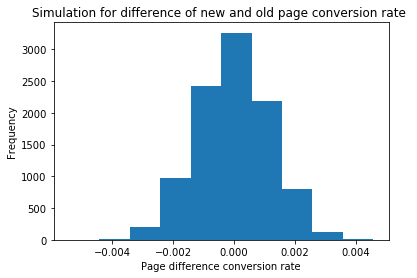

In [46]:
plt.hist(p_diffs);
plt.title("Simulation for difference of new and old page conversion rate ")
plt.xlabel("Page difference conversion rate")
plt.ylabel("Frequency")

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [47]:
#Calculating p-value
p_difference=p_new-p_old
count =0  #counter variable
for i in range(len(p_diffs)):
    if(p_diffs[i]>p_difference):
        count+=1
prop=count/len(p_diffs)
print("Proportion of the p_diffs greater than the actual difference, p_avg: ",prop)

Proportion of the p_diffs greater than the actual difference, p_avg:  0.9049


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

Here, we are calculating the p-value. This is the probability of observing our statistic if the null hypothesis is true.

Here, the p-value is calculated as 0.9049.Large p value means we should not move from null hypothesis.
Also,the difference between new and old page conversion is not significant.

These suggest that we do not have sufficient evidence to reject the null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [48]:
import statsmodels.api as sm
#from scipy.interpolate import LinearNDInterpolator

convert_old = df2[((df2['landing_page']=='old_page') & (df2['converted']==1))].user_id.count()
convert_new =  df2[((df2['landing_page']=='new_page') & (df2['converted']==1))].user_id.count()

print("Number of users on old pages: ",n_old,'\n',"Number of users on new pages :",n_new)
print("Number of conversions from old pages: ",convert_old,'\n',"Number of conversions from new pages :",convert_new)

Number of users on old pages:  145274 
 Number of users on new pages : 145310
Number of conversions from old pages:  17489 
 Number of conversions from new pages : 17264


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [55]:
# Calculating z score and p value

from scipy.stats import norm

z_score, p_value = sm.stats.proportions_ztest(count=[convert_old, convert_new], nobs=[n_old, n_new],alternative='smaller')

print("z_score : ", z_score, '\n', "p value: ",p_value)

# Assuming 95% confidence level. Type I error rate was defined as 5% in part 2.
print("Critical value at confidence interval of 95% : ", norm.ppf(1-(0.05)))

print("z_score at confidence interval of 95% : ",norm.cdf(z_score))


z_score :  1.31092419842 
 p value:  0.905058312759
Critical value at confidence interval of 95% :  1.64485362695
z_score at confidence interval of 95% :  0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

-I believe, the p value(0.9) is too large to be statistically significant to reject the null hypothesis.
-Also, we find that the z-score of 1.31092419842 is less than the critical value of 1.64485362695. 
So, we accept the null hypothesis. 
This is in agrrement with the findings in parts j and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Here, logistic regression should be preformed.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [56]:
# Creating column for intercept
df2['intercept']=1 

# Creating dummy variable column
df2['ab_page']=np.where(df2['group']=='treatment',1,0)

# Checking the added columns
df2.head()

C:\Users\deo_joshi\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\deo_joshi\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [57]:
ln=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results=ln.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [61]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 09 Mar 2018   Pseudo R-squ.:               8.077e-06
Time:                        04:59:29   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

- p value associated with ab_page

Null hypothesis, H0: pnew-pold = 0

Alternative hypothesis, H1: pnew-pold != 0

Here, p value calculated for ab_page is 0.190. Again, like the p value calculated in part 2 , this value is too big to be statistically significant in order to reject the null hypothesis.

- Differences in p value calculated in part 2 and 3

p value calculated in part 2 is 0.905 and that in part 3 is 0.19. It seems these p values are different. However, going into the detailed analysis, I have found out that these values are in fact interchangeble. Below are my observations:

In part2, we had to find out which page had a higher conversion rate. Hence, a one tailed test was carried out. 
A one-tailed test is a statistical test in which the critical area of a distribution is one-sided so that it is either greater than or less than a certain value, but not both.Here, the critical region lies in only one tail. This explains the comparatively higher p value of 0.9 found in part 2.

In part 3, we are observing whether there is a significant difference in conversion based on which page a customer receives.Thus, a two-tailed test is carried out. 
A two-tailed test is a statistical test in which the critical area of a distribution is two-sided and tests whether a sample is greater than or less than a certain range of values.Herein the critical region is on both the tails. 
For example, if we are using a significance level of .05, a two-tailed test divides this value in half, meaning that .025 is in each tail of the distribution.

In our case, p value calculated in part 3 was 0.19. To compare this value with the p value found in part 2, lets divide it by 2, as we are concerned with only one tail now.Dividing it by half gives us the value of 0.095(1/.19).
Now, since in part 2, we had to find out which page had a higher conversion rate i.e. the right side of the tail, we need to subtract 0.095 from 1.Subtracting it from 1 ie. (1-0.095) gives us p value of 0.905. This is same as the p value calculated in part 2.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

We should consider other factors into the regression model as they might influence the conversions too. For example, taking into account the time spent on each page or the type of users might help.

Yes, there are disadvantages to adding additional terms into the regression model. I believe,some factors can be redundant as well.
Also, fitting too many variables into the model can cause multicollinearity. Due to this, some relationships can get flipped. Multicollinearity reduces the precision of the estimate coefficients, which weakens the statistical power of the regression model.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [62]:
# New dataset with added column : country
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [63]:
# Creating dummy variables for country
df_new[['CA','UK','US']]=pd.get_dummies(df_new['country'])

# Checking the added columns
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
851104,US,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,0,1
804228,US,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,0,1
661590,US,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,0,1
853541,US,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,0,1
864975,US,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [64]:
# Fitting the new model

ln1=sm.Logit(df_new['converted'],df_new[['intercept','US','UK']])
results1 = ln1.fit()
results1.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 09 Mar 2018   Pseudo R-squ.:               1.521e-05
Time:                        05:00:21   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0408      0.027      1.518      0.129      -0.012       0.093
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

<a id='conclusions'></a>
## Conclusions

-Based on the above data, I believe country of an individual does not have an influence on conversion rate as
conversion rate of both UK and US are almost similar(0.0408 and 0.0507).

-The p value again is too large to provide sufficient evidence to reject null hypothesis. This is in conjunction with the above findings.

-Hence, we accept the null hypothesis and reject the alternative hypothesis.

-This means that old pages does better than new pages and hence, they can be retained by the website.

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.